# Course:CSCI 5415 Data Mining
# Group Name: KAPPA
# Group Project Milestone - Phase 3: Data Collection 
# Group Members:
### --Carmen Avitia(cavitia@nmsu.edu)
### --Victoria Franco(vichol@nmsu.edu)
### --Daniela Pedroza Rodriguez( dgpedroz@nmsu.edu)
### --Ying Yang (yy0816@nmsu.edu)

## Data Source: 
### -- Global Super Store Dataset: https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset/data
### -- Ecommerce Consumer Behavior Dataset: https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/data
## Created by: Victoria Franco
## Followed by: Ying Yang, Carmen Avitia
## Created on: 9/15/2025

In [91]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Load Dataset
# For Global Superstore
df = pd.read_csv("Global_Superstore2.csv",encoding="latin1")

In [93]:
# For Consumer Behaviour 
#df = pd.read_csv("ECommerce_consumer behaviour.csv",encoding="latin1" )

In [94]:
# Basic Exploration
print("Shape:", df.shape)

Shape: (51290, 24)


In [95]:

print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-100030

In [96]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [97]:
print("\n--- Null Counts ---")
print(df.isna().sum())


--- Null Counts ---
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [98]:
# check if has duplicated values
df.duplicated().sum()

np.int64(0)

In [99]:
# find unique values
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [100]:
print("\n--- Summary (Numeric) ---")
print(df.describe())


--- Summary (Numeric) ---
            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       3

In [101]:
print("\n--- Summary (Categorical) ---")
print(df.describe(include="O"))


--- Summary (Categorical) ---
              Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
count            51290       51290       51290           51290       51290   
unique           25035        1430        1464               4        1590   
top     CA-2014-100111  18-06-2014  22-11-2014  Standard Class    PO-18850   
freq                14         135         130           30775          97   

          Customer Name   Segment           City       State        Country  \
count             51290     51290          51290       51290          51290   
unique              795         3           3636        1094            147   
top     Muhammed Yedwab  Consumer  New York City  California  United States   
freq                108     26518            915        2001           9994   

       Market   Region       Product ID         Category Sub-Category  \
count   51290    51290            51290            51290        51290   
unique      7       13            10

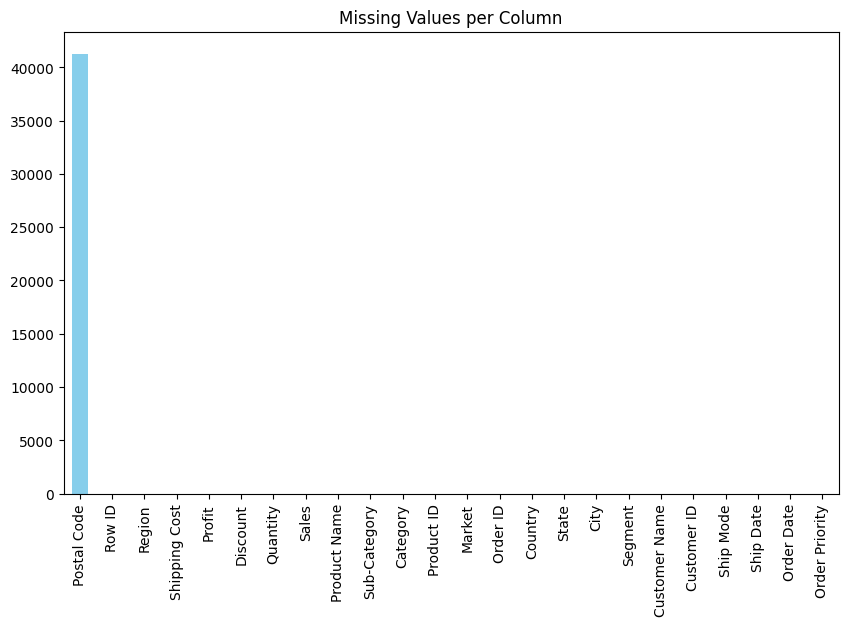

In [102]:
# Missing Values Visualization
plt.figure(figsize=(10,6))
df.isna().sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Missing Values per Column")
plt.show()

## --------------> Handling Missing Values

In [103]:
# Drop Postal Code if it exists
if "Postal Code" in df.columns:
    df.drop("Postal Code", axis=1, inplace=True)

# Drop days_since_prior_order if it exists
if "days_since_prior_order" in df.columns:
    df["days_since_prior_order"] = df["days_since_prior_order"].fillna(df["days_since_prior_order"].median())   #fill with median

# Check missing values
print(df.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [104]:
# Unique Values
for col in df.select_dtypes(include="object").columns[:]:  # limit to first 10 for brevity
    print(f"{col}: {df[col].nunique()} unique values")

Order ID: 25035 unique values
Order Date: 1430 unique values
Ship Date: 1464 unique values
Ship Mode: 4 unique values
Customer ID: 1590 unique values
Customer Name: 795 unique values
Segment: 3 unique values
City: 3636 unique values
State: 1094 unique values
Country: 147 unique values
Market: 7 unique values
Region: 13 unique values
Product ID: 10292 unique values
Category: 3 unique values
Sub-Category: 17 unique values
Product Name: 3788 unique values
Order Priority: 4 unique values


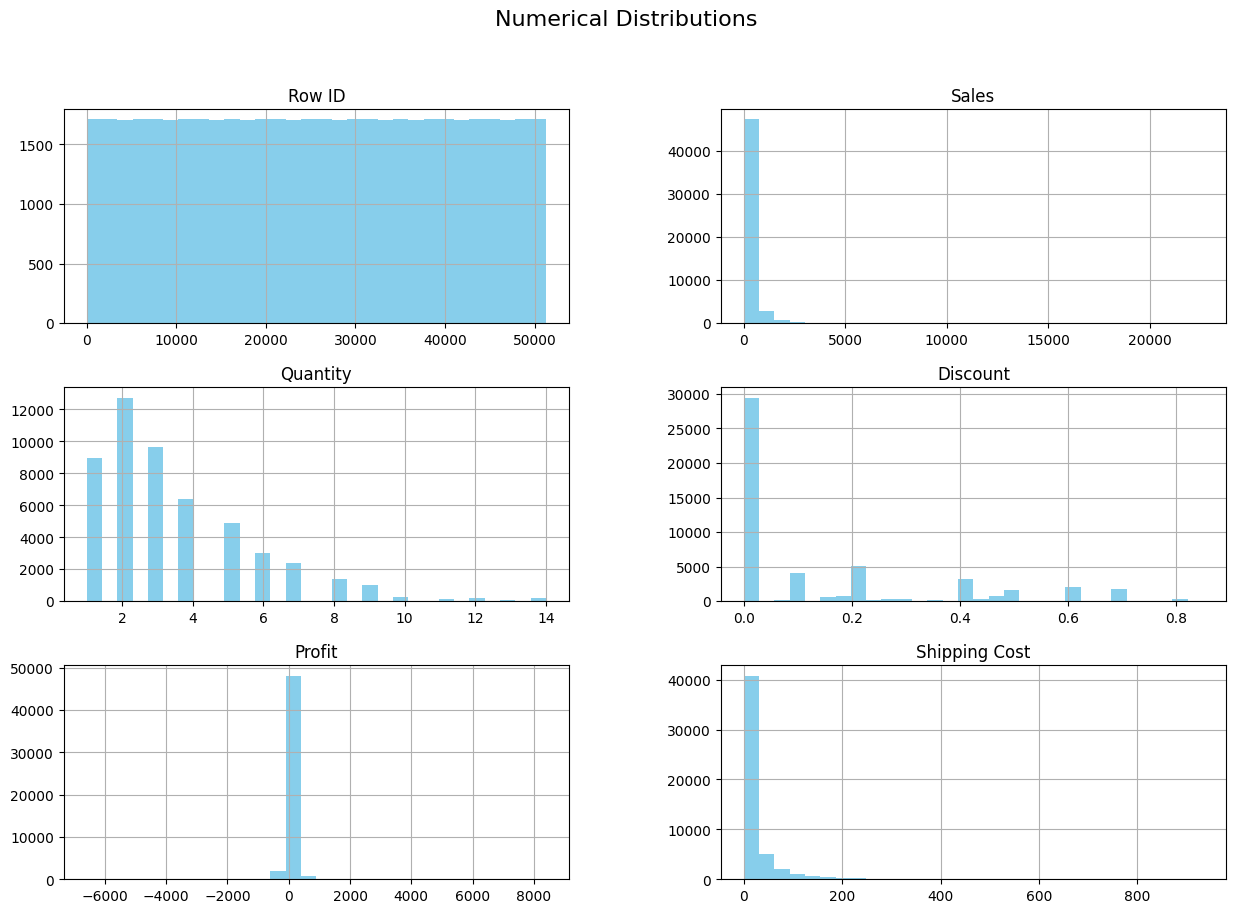

In [105]:
# Distributions of Numerical Features
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(15,10), color="skyblue")
plt.suptitle("Numerical Distributions", fontsize=16)
plt.show()

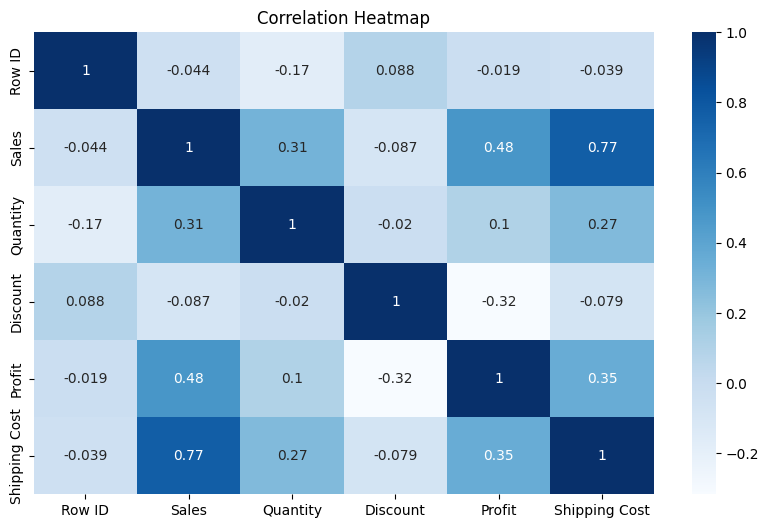

In [106]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

## ------------analysis of Global supermarker dataset---------------------------------

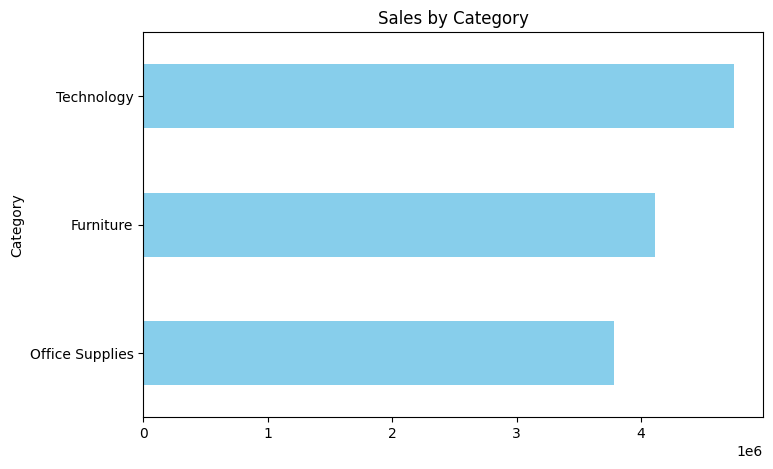

In [107]:
# 8. Categorical Exploration
if "Category" in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby("Category")["Sales"].sum().sort_values().plot(kind="barh", color="skyblue")
    plt.title("Sales by Category")
    plt.show()

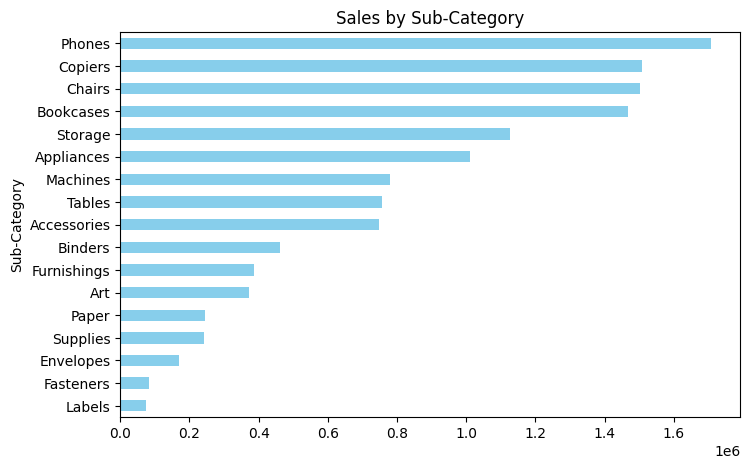

In [108]:
if "Sub-Category" in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby("Sub-Category")["Sales"].sum().sort_values().plot(kind="barh", color="skyblue")
    plt.title("Sales by Sub-Category")
    plt.show()

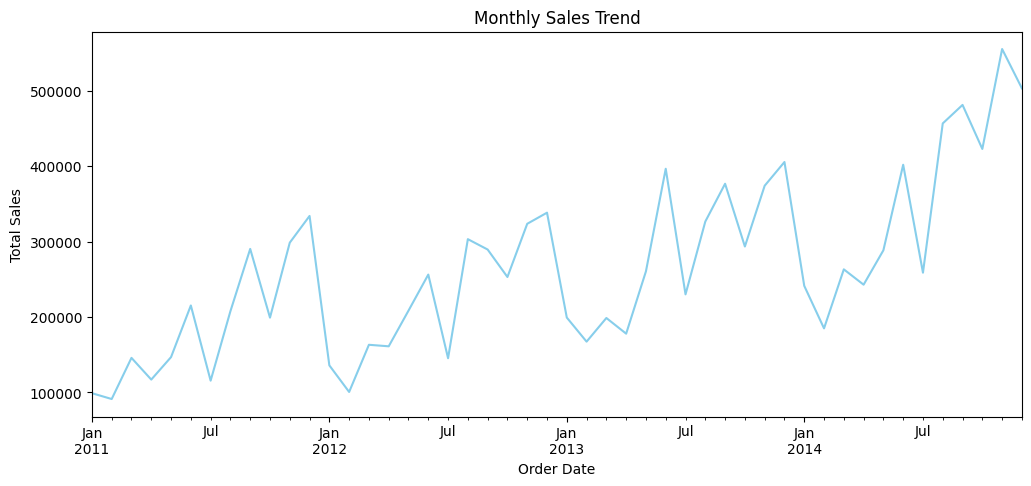

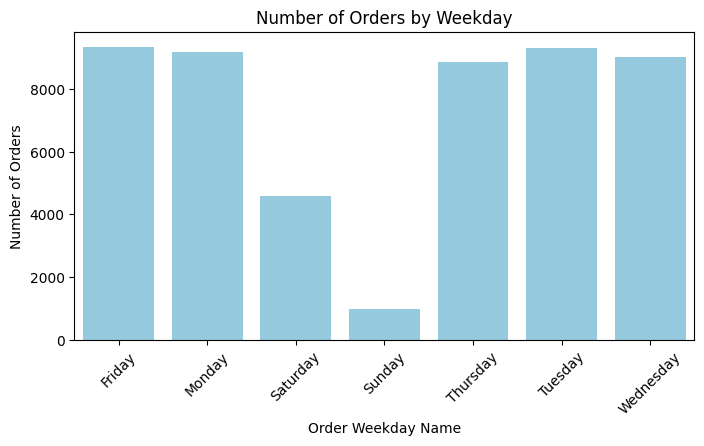

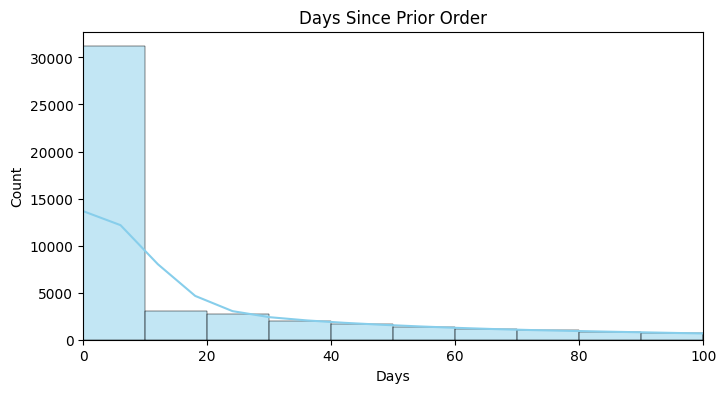

In [109]:
# Time-Based Analysis
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce", dayfirst=True)
    monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
    monthly_sales.plot(figsize=(12,5), color="skyblue")
    plt.title("Monthly Sales Trend")
    plt.ylabel("Total Sales")
    plt.show()

    # --------------> Identify which weekdays customers prefer to purchase items <-------------------.
    
    # Extract the weekday
    # 0 = Monday, 6 = Sunday
    df['Order Weekday'] = df['Order Date'].dt.weekday  
    
    # Optional: get weekday names
    df['Order Weekday Name'] = df['Order Date'].dt.day_name()

    #Overall order count per weekday
    weekday_counts = df['Order Weekday Name'].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x=weekday_counts.index, y=weekday_counts.values, color="skyblue")
    plt.title("Number of Orders by Weekday")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.show()

    # --------------------> Analyze the distribution of days since customers’ prior orders -----------------------------
    # Sort orders by customer and date
    df = df.sort_values(['Customer ID', 'Order Date'])
    
    # Calculate days since previous order
    df['days_since_prior_order'] = df.groupby('Customer ID')['Order Date'].diff().dt.days
    
    # Handle the first order
    ## The first order for each customer will have NaN because there is no previous order. Fill it with 0 or leave as NaN:
    df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
    
    # Distribution of days between orders:
    
    plt.figure(figsize=(8,4))
    sns.histplot(df['days_since_prior_order'], bins=120, kde=True,  color="skyblue")
    plt.title("Days Since Prior Order")
    plt.xlabel("Days")
    plt.xlim(0,100)
    plt.show()
    
    

# ----------Analysis of Monthly Sales Trend -------------
## From the graph, we can see that the overall sales trend is upward, but there are some dips at certain points, such as in February 2012, 2013, and 2014.
# ----------Analysis of Orders by Weekday----------------
## From the figure, we can see that customers are more likely to purchase products on weekdays rather than weekends, with Saturday performing better than Sunday. In particular, customers tend to make purchases on Fridays and Tuesdays.

# ------Analysis of Days Since Prior Order---------------
## Through the analysis of days since prior order, we find that most customers tend to reorder products within 30 days, especially within 10 days. This pattern suggests that many consumers follow a weekly or monthly shopping routine.

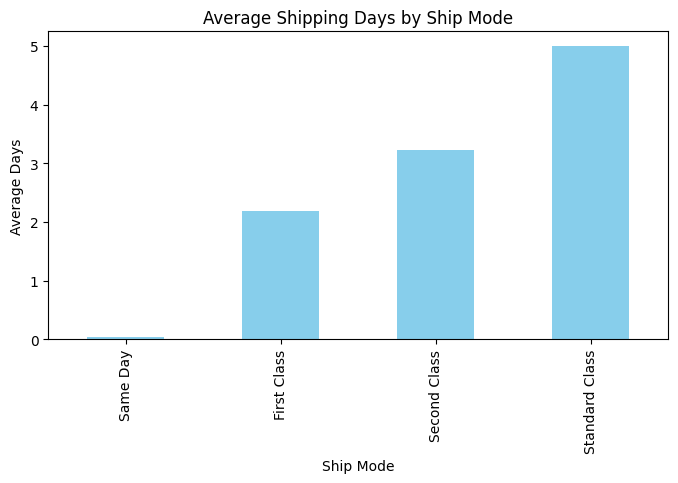

In [110]:
# Analyze average shipping days by shipping method (ship mode)

if "Order Date" in df.columns and "Ship Date" in df.columns:
    # Convert dates to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
    
    # Calculate shipping days
    df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
    
    # Summary statistics
    shipmode_stats = df.groupby('Ship Mode')['Shipping Days'].describe()
    # print(shipmode_stats)
    
    # Get average shipping days
    avg_shipdays = df.groupby('Ship Mode')['Shipping Days'].mean().sort_values()
    avg_shipdays.plot(kind='bar', color="skyblue", figsize=(8,4), title="Average Shipping Days by Ship Mode")
    plt.ylabel("Average Days")
    plt.show()



## --------Comment on ship mode--------
## Through the analysis of average shipping days by ship mode, we find that First Class takes 2.5 days, Second Class takes 3.5 days, and Standard Class takes 5 days. As the next step, we can encode or apply one-hot encoding to label these classes in order to explore their relationship with customer purchase behavior.

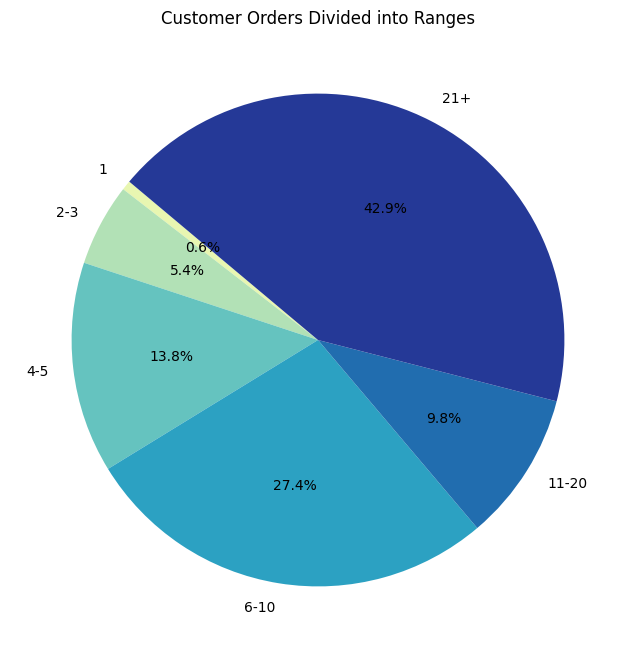

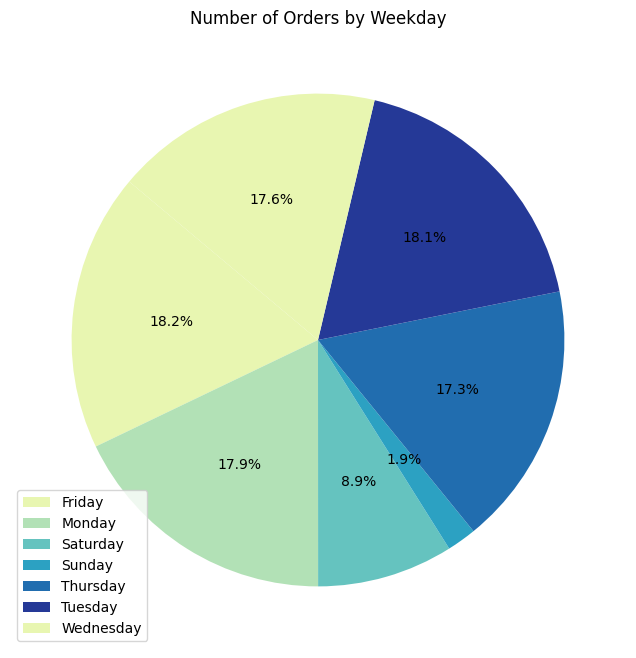

In [111]:
# --------------------> Create a pie chart showing the distribution of orders by order ranges and by weekdays <-------------------------

if "Customer ID" in df.columns and "Order ID" in df.columns:

    # Example: number of orders per customer
    customer_orders = df.groupby('Customer ID')['Order ID'].nunique()
    
    # Define ranges
    bins = [0, 1, 3, 5, 10, 20, 100]  # adjust as needed
    labels = ['1', '2-3', '4-5', '6-10', '11-20', '21+']
    
    customer_orders_range = pd.cut(customer_orders, bins=bins, labels=labels, right=True)
    
    # Count customers in each range
    range_counts = customer_orders_range.value_counts().sort_index()
    
    # Plot pie chart by orders
    plt.figure(figsize=(8,8))
    plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("YlGnBu"))
    plt.title("Customer Orders Divided into Ranges")
    plt.show()
    
    
    # PLot by weekday
    plt.figure(figsize=(8,8))
    patches, texts, autotexts = plt.pie(
        weekday_counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("YlGnBu")
    )
    plt.title("Number of Orders by Weekday")
    plt.legend(patches, weekday_counts.index, loc="best")
    plt.show()

## Analysis of the Pie Plots
### 42.9% of customers place more than 21 orders, while 17.4% of customers place between 6 and 10 orders.
### Regarding weekdays, 18.2% of orders occur on Friday and 18.1% on Tuesday, whereas Sunday accounts for only 1.9%.

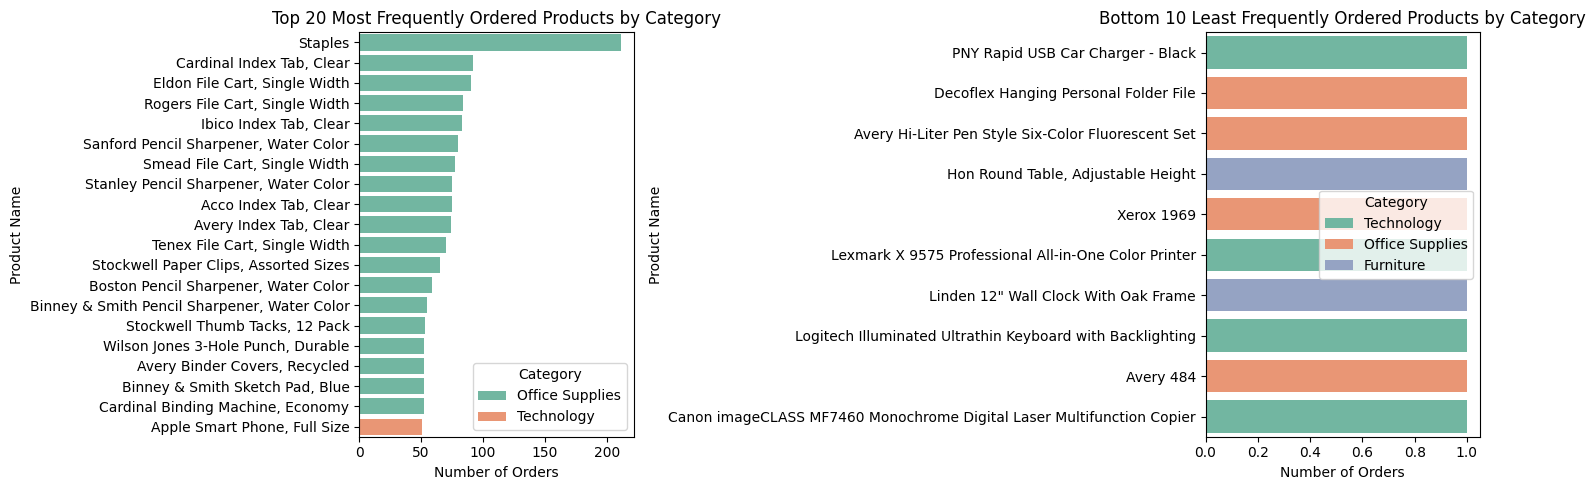

In [112]:
# -----------------> # Identify the top 20 and bottom 10 most frequently ordered products <--------------------------------

if "Category" in df.columns:

    # Count number of orders per product
    product_counts = (
        df.groupby(['Product Name', 'Category'])['Order ID']
        .count()
        .reset_index()
        .rename(columns={'Order ID':'Order Count'})
    )
    
    # Sort for top and bottom products
    top_n = 20
    bottom_n = 10
    top_products = product_counts.sort_values('Order Count', ascending=False).head(top_n)
    bottom_products = product_counts.sort_values('Order Count', ascending=True).head(bottom_n)
    
    # Create a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    
    # Top products plot
    sns.barplot(
        data=top_products,
        x='Order Count',
        y='Product Name',
        hue='Category',
        dodge=False,
        ax=axes[0],
        palette="Set2"
    )
    axes[0].set_title(f"Top {top_n} Most Frequently Ordered Products by Category")
    axes[0].set_xlabel("Number of Orders")
    axes[0].set_ylabel("Product Name")
    axes[0].legend(title="Category")
    
    # Bottom products plot
    sns.barplot(
        data=bottom_products,
        x='Order Count',
        y='Product Name',
        hue='Category',
        dodge=False,
        ax=axes[1],
        palette="Set2"
    )
    axes[1].set_title(f"Bottom {bottom_n} Least Frequently Ordered Products by Category")
    axes[1].set_xlabel("Number of Orders")
    axes[1].set_ylabel("Product Name")
    axes[1].legend(title="Category")
    
    plt.tight_layout()
    plt.show()



## Top and Bottom 20 Most Frequently Ordered Products
### The top 20 most frequently ordered products are mainly from the Office Supplies category, followed by Technology. In contrast, the bottom 10 most frequently ordered products are primarily from Technology and Office Supplies.

## ------------------ Analysis of Ecommerce behavior dataset-------------------------

In [113]:

if "department" in df.columns:
    plt.figure(figsize=(8,5))
    df["department"].value_counts().head(10).plot(kind="bar", color= "plum" )
    plt.title("Top 10 Departments (Consumer Behaviour)")
    plt.show()

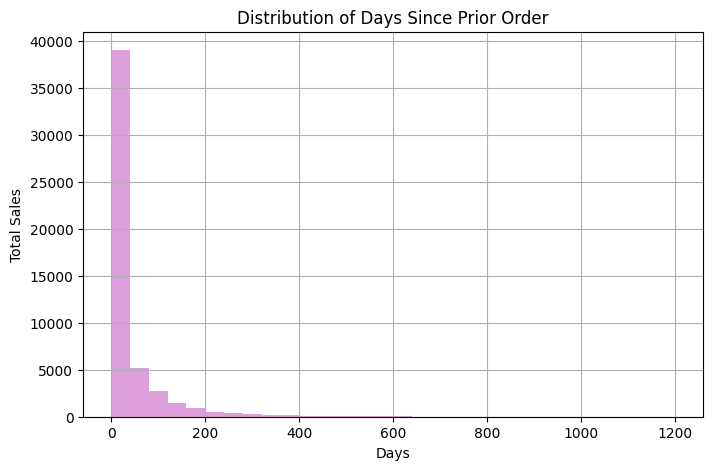

In [114]:
# Customer Behavior (Consumer Behaviour dataset)
if "days_since_prior_order" in df.columns:
    plt.figure(figsize=(8,5))
    df["days_since_prior_order"].dropna().hist(bins=30, color="plum")
    plt.title("Distribution of Days Since Prior Order")
    plt.xlabel("Days")
    plt.ylabel("Total Sales")
    plt.show()


In [115]:
if "order_hour_of_day" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="order_hour_of_day", data=df, color="plum")
    plt.title("Consumer Behavior: Orders by Hour of Day")
    plt.show()


if "order_dow" in df.columns:
    # Map numbers 0–6 to weekday names
    dow_map = {
        0: "Sunday", 1: "Monday", 2: "Tuesday",
        3: "Wednesday", 4: "Thursday",
        5: "Friday", 6: "Saturday"
    }
    df["order_dow_name"] = df["order_dow"].map(dow_map)

    plt.figure(figsize=(10,5))
    sns.countplot(
        x="order_dow_name",
        data=df,
        order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],
        color="plum"
    )
    plt.title("Consumer Behavior: Orders by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.show()

In [116]:
if "reordered" in df.columns:
    reorder_rate = df["reordered"].mean()
    print(f"Reorder Rate: {reorder_rate:.2%}")

# --- E-Commerce: Reorder rate per department ---
    ecom_dept = df.groupby("department")["reordered"].mean().reset_index()
    ecom_dept.rename(columns={"reordered": "Reorder_Rate"}, inplace=True)

# --- Plot ---
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=ecom_dept.sort_values("Reorder_Rate", ascending=False),
        x="Reorder_Rate", 
        y="department", 
        palette="PiYG"
    )
    
    plt.title("Consumer Behavior: Reorder Rate by Department")
    plt.xlabel("Reorder Rate")
    plt.ylabel("Department")
    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------------------------------------------
# Visualizes outliers before and after capping using boxplots for all numerical columns
## Outliers were capped at a reasonable threshold (e.g., using IQR or percentile limits) 
## to observe their behavior without removing them completely from the dataset.

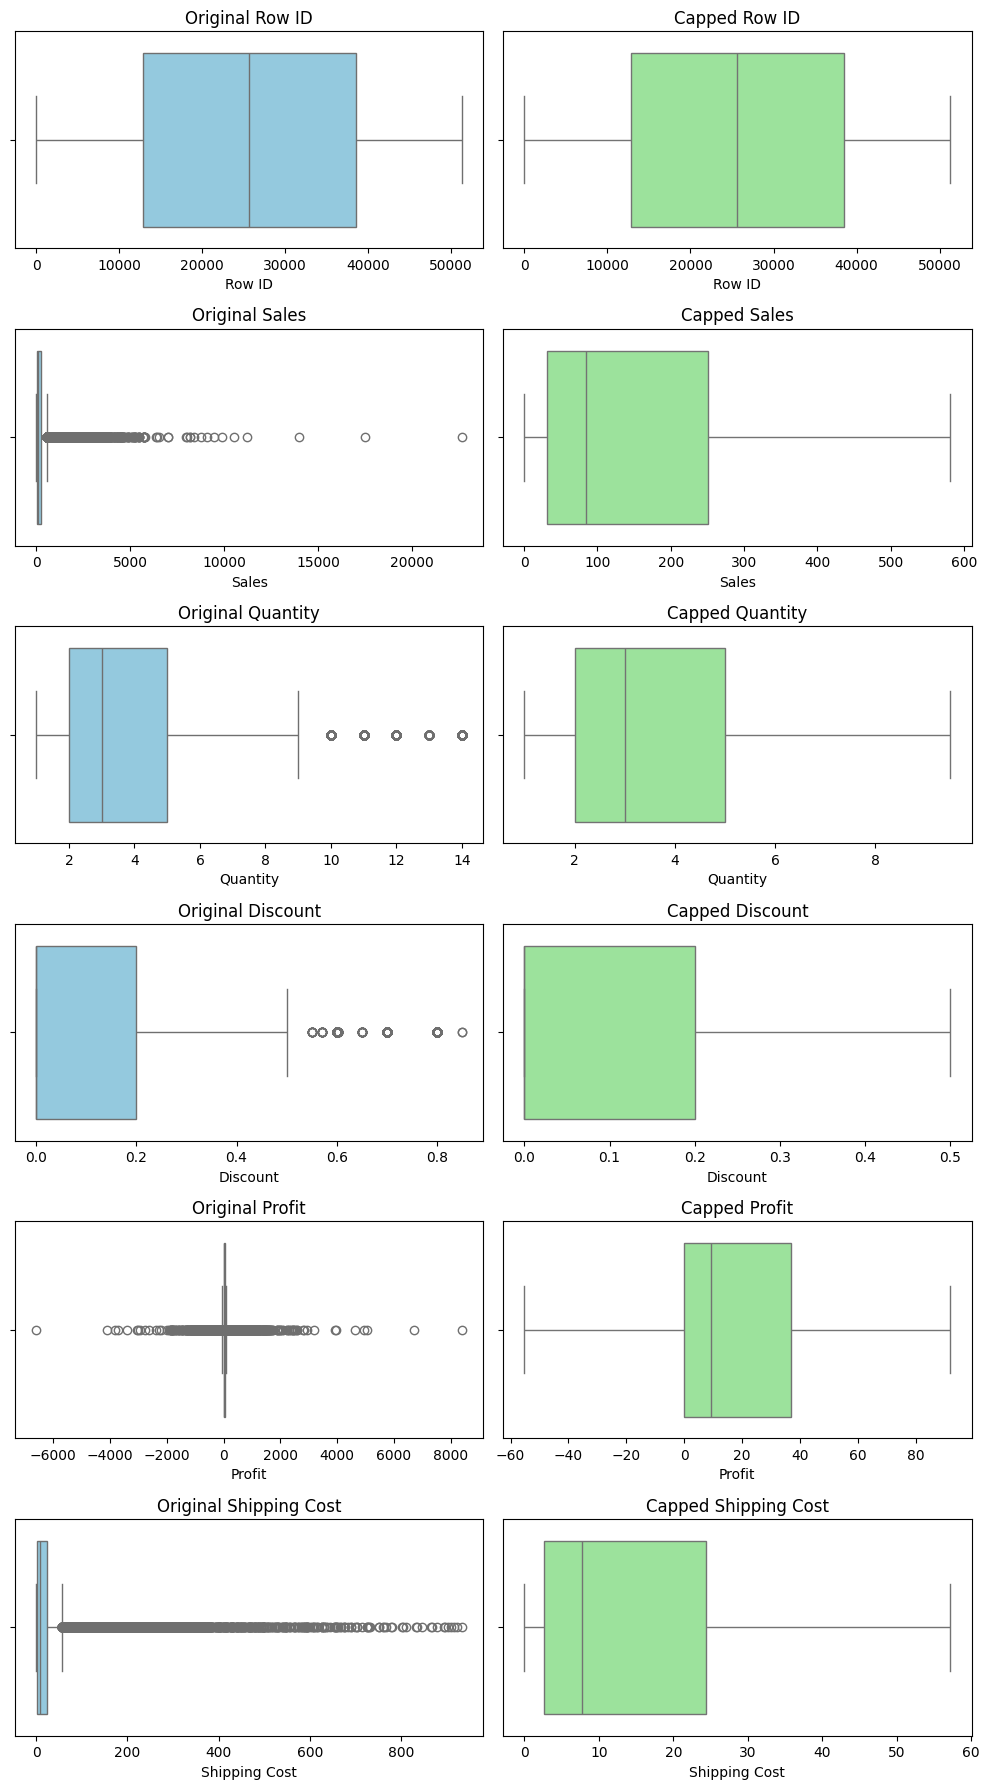

In [117]:

# Function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series > upper, upper, np.where(series < lower, lower, series))

# -----------------------------
# Create capped dataframe
df_capped = df.copy()
for col in num_cols:
    df_capped[col] = cap_outliers(df[col])

# -----------------------------
# Plot boxplots before and after capping
plt.figure(figsize=(10, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    # Before capping
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'Original {col}')
    
    # After capping
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df_capped[col], color="lightgreen")
    plt.title(f'Capped {col}')

plt.tight_layout()
plt.show()


## Outliers were not removed in this analysis. Instead, they were handled using robust techniques such as log transformation, median/IQR-based statistics, and robust scaling to reduce their influence. This approach ensures that extreme values are retained for analysis (since they may represent important business cases like high-value customers) while minimizing their distortion on overall results.